In [11]:
import numpy as np
from matplotlib import pyplot
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

%matplotlib inline
pyplot.style.use('ggplot')

CROSS_VALIDATION_SETS = 5
MAX_K = 10
RANDOM_STATE = 69
LABEL_NAMES = ['English', 'Urdu', 'Mixed']

# Importing Dataset

In [12]:
data = pd.read_csv('dataset.csv')

train = data.sample(frac = 0.8, random_state = RANDOM_STATE)
test = data.drop(train.index)

train = train.to_numpy()
test = test.to_numpy()

train_x = train[:, 1:14]
train_y = train[:, 14]

test_x = test[:, 1:14]
test_y = test[:, 14]

# Cross Validation

In [13]:
acc_list = list()
f1_list = list()

def knn_cross_validation(k, train_x, train_y, cv_sets):
    knn = KNeighborsClassifier(n_neighbors=k, p=2)
    preds = cross_val_predict(knn, train_x, train_y, cv=cv_sets)

    acc = accuracy_score(train_y, preds) * 100
    f1 = classification_report(train_y, preds, output_dict=True)["macro avg"]["f1-score"]

    return acc, f1


for i in range(1, MAX_K + 1):
    acc, f1 = knn_cross_validation(i, train_x, train_y, CROSS_VALIDATION_SETS)

    acc_list.append(acc)
    f1_list.append(f1)

    print(f"{i}th iteration complete")

1th iteration complete
2th iteration complete
3th iteration complete
4th iteration complete
5th iteration complete
6th iteration complete
7th iteration complete
8th iteration complete
9th iteration complete
10th iteration complete


In [14]:
def plot_confusion_matrix(conf_mat, labels):
    classes = list(labels)
    df_cm = pd.DataFrame(conf_mat,classes,classes)
    pyplot.figure(figsize=(10,7))
    sns.set(font_scale=1.4)
    sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')
    pyplot.show()

def plot(x, y, xlabel, ylabel, title):
    pyplot.plot(x,y)
    pyplot.xlabel(xlabel)
    pyplot.ylabel(ylabel)
    pyplot.title(title)
    pyplot.xticks(x)
    pyplot.show()

x = [i for i in range(1, MAX_K + 1)]

# Cross Validation Plots

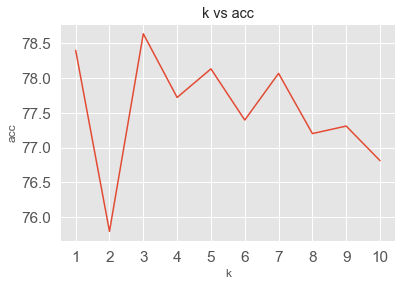

In [15]:
plot(x, acc_list, 'k', 'acc', 'k vs acc')

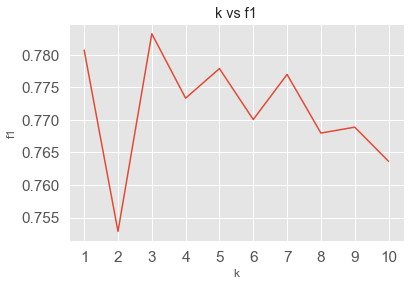

In [16]:
plot(x, f1_list, 'k', 'f1', 'k vs f1')

# Best value ---> k = 3

# Running For Test Data

In [17]:
def test_knn(k, train_x, train_y, test_x, test_y):
    knn = KNeighborsClassifier(n_neighbors=k, p=2)
    knn.fit(train_x, train_y)
    preds = knn.predict(test_x)

    cfm = confusion_matrix(test_y, preds)
    stats = classification_report(test_y, preds, target_names=LABEL_NAMES)

    return stats, cfm

Some Statistics

In [18]:
stats, cfm = test_knn(3, train_x, train_y, test_x, test_y)

print(stats)

              precision    recall  f1-score   support

     English       0.71      0.79      0.75      1072
        Urdu       0.83      0.80      0.81      1368
       Mixed       0.81      0.75      0.78      1036

    accuracy                           0.78      3476
   macro avg       0.78      0.78      0.78      3476
weighted avg       0.79      0.78      0.78      3476



COnfusion Matrix

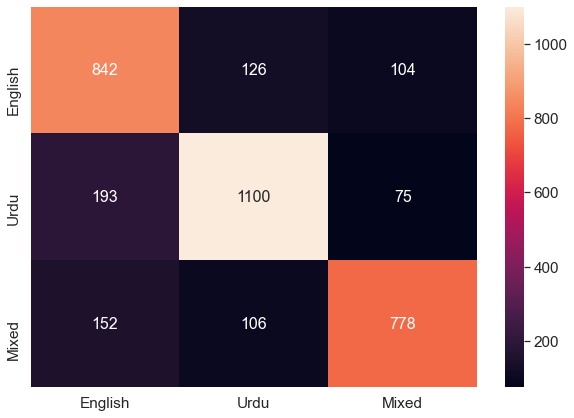

In [19]:
plot_confusion_matrix(cfm, LABEL_NAMES)